# **BioNTech SE**

## *Librerías*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from sktime.forecasting.arima import AutoARIMA
from statsmodels.graphics import tsaplots
from sktime.utils.plotting import plot_correlations
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.transformations.series.boxcox import LogTransformer
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.transformations.series.difference import Differencer
from sktime.utils.plotting import plot_series
from sktime.forecasting.ets import AutoETS
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## *Lectura del CSV y preparación del dato*
Fuente: https://finance.yahoo.com/quote/BNTX/history?period1=1570665600&period2=1651881600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [4]:
df_bntx = pd.read_csv("BNTX2.csv")
df_bntx['Date'] = pd.to_datetime(df_bntx['Date'])
df_bntx = df_bntx.set_index("Date")
df_bntx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-10,16.50,16.698999,13.010,14.24,14.24,2805800
2019-10-11,15.34,15.340000,13.500,13.82,13.82,1364300
2019-10-14,13.83,13.910000,12.525,12.75,12.75,899100
2019-10-15,12.99,13.000000,12.530,12.92,12.92,484700
2019-10-16,13.20,13.880000,12.610,12.94,12.94,524200


In [5]:
type(df_bntx)

pandas.core.frame.DataFrame

In [6]:
ohlc_dict = {'Open':'first','High':'max','Low':'min','Close': 'last','Volume': 'sum'}
# explicación: https://stackoverflow.com/questions/28126286/convert-daily-pandas-stock-data-to-monthly-data-using-first-trade-day-of-the-mon

In [7]:
df_bntx = df_bntx.resample('M', closed='right', label='right').agg(ohlc_dict)

In [8]:
df_bntx.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-31,253.869995,256.140015,135.130005,172.080002,61795600
2022-02-28,182.179993,184.130005,138.565994,150.809998,30328900
2022-03-31,150.270004,189.074005,121.320000,170.559998,42160500
2022-04-30,169.500000,186.240005,137.509995,138.779999,27615400
2022-05-31,139.669998,152.889999,133.619995,136.169998,6213100


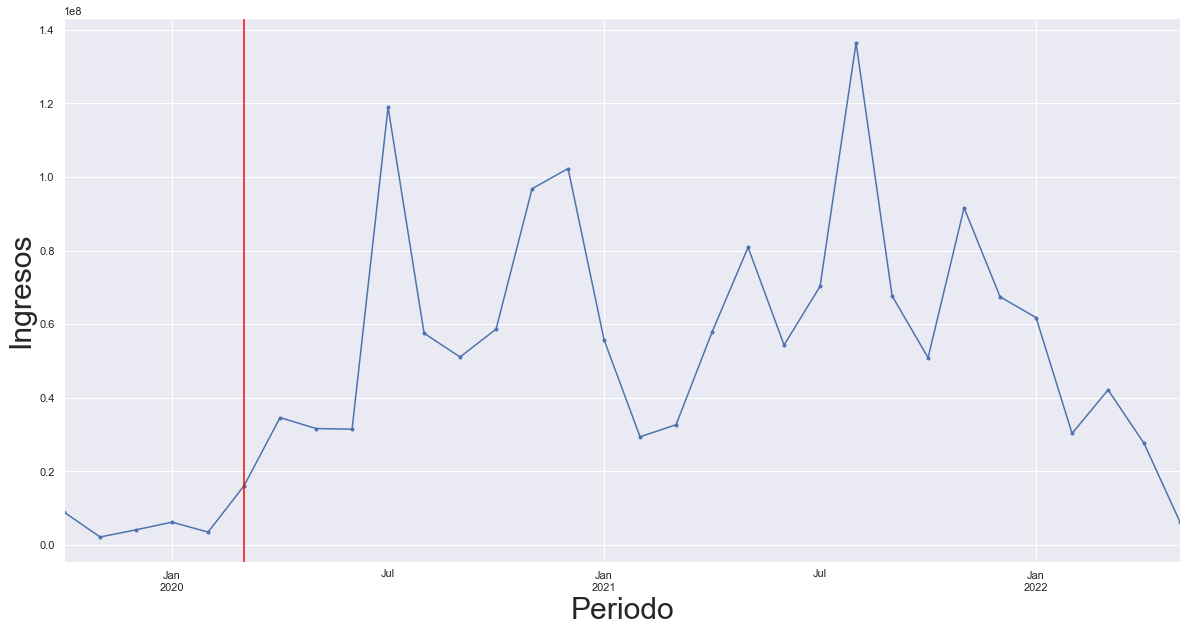

In [9]:
# Ploteamos nuestra serie temporal:
sns.set(rc={'figure.figsize':(20, 10)})
fig = df_bntx['Volume'].plot(marker='.') 
fig.set_ylabel('Ingresos', fontsize = 30)
fig.axvline('2020-03-01', color = 'red', linewidth= 1.5)
fig.set_xlabel('Periodo', fontsize = 30);

In [10]:
def split_and_summarize(dataframe, column, size, fn):
    ranges = []
    values = []
    for i in range(0, len(dataframe), size):
        ranges.append(dataframe[i:i + size])
    for i in ranges:
        values.append(fn(i[column]))
    return(values)

In [11]:
mean = split_and_summarize(df_bntx, 'Volume', 4, np.mean)

variance = split_and_summarize(df_bntx, 'Volume', 4, np.var)

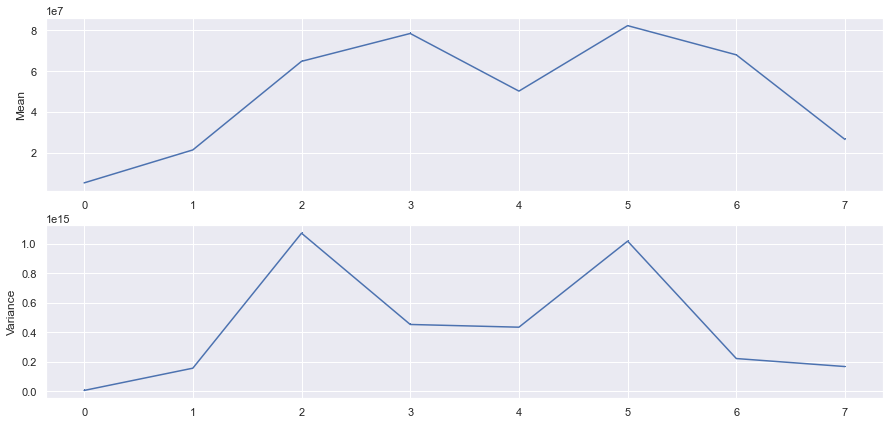

In [12]:
cols = ['mean', 'variance']
df = pd.DataFrame([mean, variance], index=cols)

sns.set(rc={'figure.figsize':(15, 7)})
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(mean, ',-')
ax1.set_ylabel('Mean')

ax2.plot(variance, ',-')
ax2.set_ylabel('Variance')

plt.show()

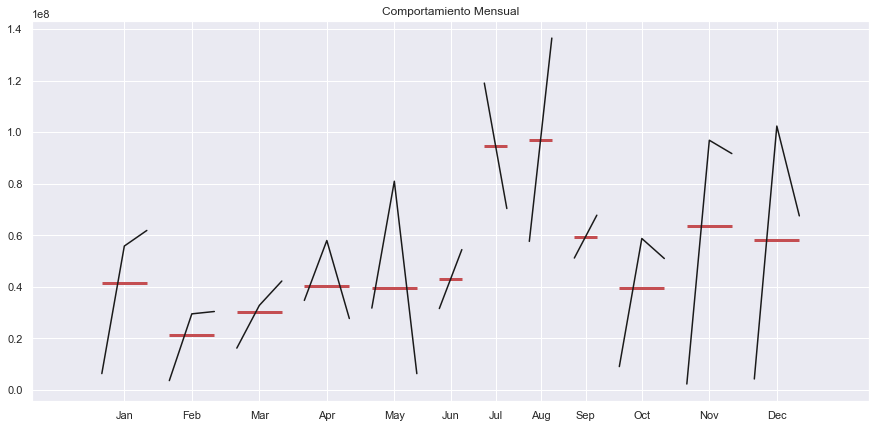

In [13]:
ax = plt.gca()
sm.graphics.tsa.month_plot(df_bntx['Volume'], ax=ax)
ax.set_title('Comportamiento Mensual');

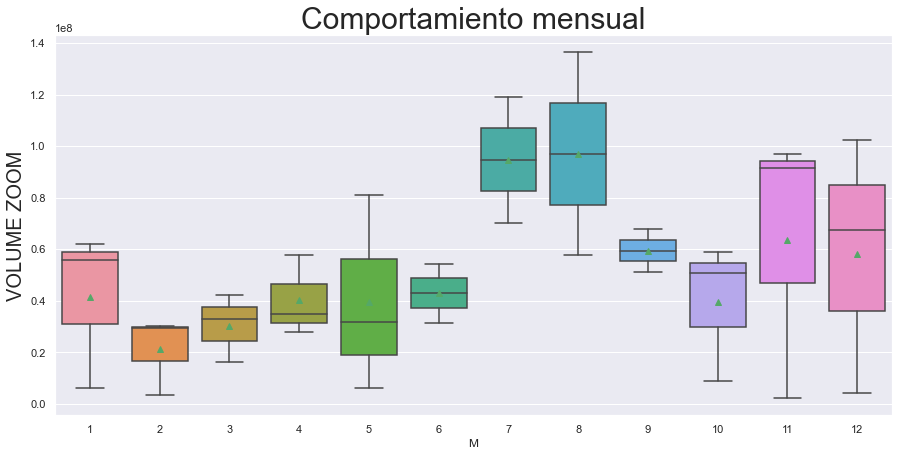

In [14]:
df_bntx['M'] = df_bntx.index.month
sns.boxplot(data = df_bntx, x = 'M', y='Volume', showmeans=True)
ax = plt.gca()
ax.set_ylabel('VOLUME ZOOM', fontsize = 20)
ax.set_title('Comportamiento mensual', fontsize = 30);

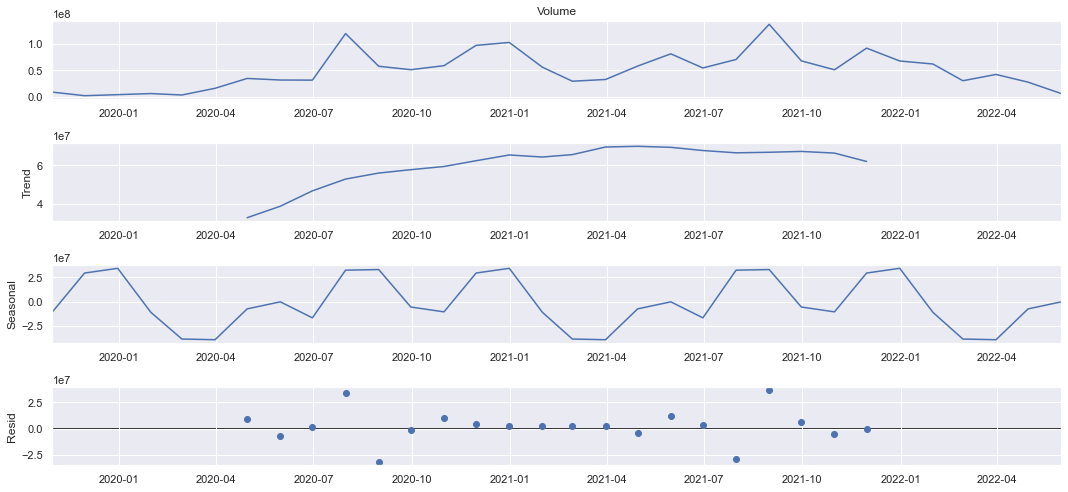

In [15]:
desglose = seasonal_decompose(df_bntx['Volume'], 
                                   model='additive', 
                                   period=12);
desglose.plot();